在这个文档里，将对SPEI数据进行分析。

In [28]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import rioxarray as rxr
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['font.family'] = ['sans-serif']

In [29]:
spei_frame = xr.open_dataset('./spei_monthly_2000_2015.nc',decode_coords='all')

In [30]:
spei_frame.loc[dict(month=1)]

<xarray.Dataset>
Dimensions:      (y: 96, x: 84)
Coordinates:
    month        int32 1
  * y            (y) float64 32.04 32.12 32.21 32.29 ... 39.71 39.8 39.88 39.96
  * x            (x) float64 114.0 114.1 114.2 114.3 ... 120.7 120.8 120.9 121.0
    spatial_ref  int32 ...
Data variables:
    spei         (y, x) float32 ...

Text(0, 0.5, 'Latitude')

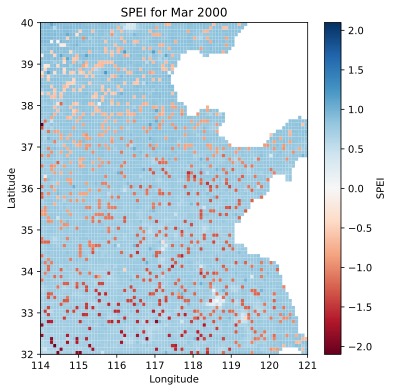

In [44]:
sf=spei_frame.loc[dict(month=3)]

fig,ax = plt.subplots(figsize=(6,6))
sf.spei.plot(ax=ax,cmap='RdBu',cbar_kwargs={'label':'SPEI'})
ax.set_title('SPEI for Mar 2000')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



In [32]:
spei3_frame = xr.open_dataset('./spei_3month_2000_2015.nc',decode_coords='all')

In [33]:
drought_mat = np.empty_like(spei3_frame.loc[dict(month=1)].spei)

flood_mat = np.empty_like(spei3_frame.loc[dict(month=1)].spei)

In [34]:
drought_frames = spei3_frame.where(spei3_frame.spei < -1, 9999)
drought_frames = drought_frames.where(drought_frames.spei == 9999, 1)
drought_frames = drought_frames.where(drought_frames.spei == 1, np.nan)

flood_frames = spei3_frame.where(spei3_frame.spei > 1, 9999)
flood_frames = flood_frames.where(flood_frames.spei == 9999, 1)
flood_frames = flood_frames.where(flood_frames.spei == 1, np.nan)


Text(0.5, 1.0, 'Droughts happend in 2000-2015, 3-month SPEI < -1')

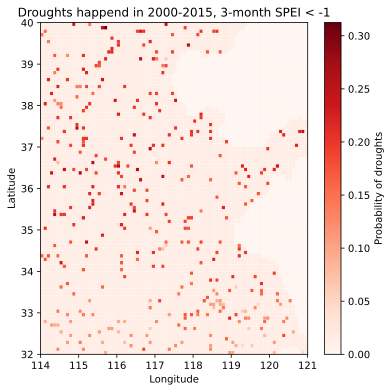

In [35]:
fig,ax = plt.subplots(figsize=(6,6))
(drought_frames.sum(dim='month').spei/64).plot(ax = ax,cmap = "Reds",cbar_kwargs={'label': 'Probability of droughts'})

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Droughts happend in 2000-2015, 3-month SPEI < -1')

Text(0.5, 1.0, 'Floods happend in 2000-2015, 3-month SPEI > 1')

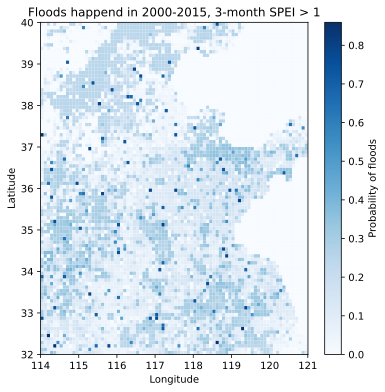

In [36]:
fig,ax = plt.subplots(figsize=(6,6))
(flood_frames.sum(dim='month').spei/64).plot(ax = ax,cmap = "Blues",cbar_kwargs={'label': 'Probability of floods'})

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Floods happend in 2000-2015, 3-month SPEI > 1')


In [37]:
chunks = 64*96*84

sp3_array = spei3_frame.spei.to_numpy()
df_light_counts = ((sp3_array < -0.5) & (sp3_array >= -1)).sum()
df_medium_counts = ((sp3_array < -1) & (sp3_array >= -1.5)).sum()
df_severe_counts = ((sp3_array < -1.5) & (sp3_array >= -2)).sum()
df_extreme_counts = (sp3_array < -2).sum()

ff_light_counts = ((sp3_array > 0.5) & (sp3_array <= 1)).sum()
ff_medium_counts = ((sp3_array > 1) & (sp3_array <= 1.5)).sum()
ff_severe_counts = ((sp3_array > 1.5) & (sp3_array <= 2)).sum()
ff_extreme_counts = (sp3_array > 2).sum()

df_counts = [df_light_counts,df_medium_counts,df_severe_counts,df_extreme_counts]
ff_counts = [ff_light_counts,ff_medium_counts,ff_severe_counts,ff_extreme_counts]

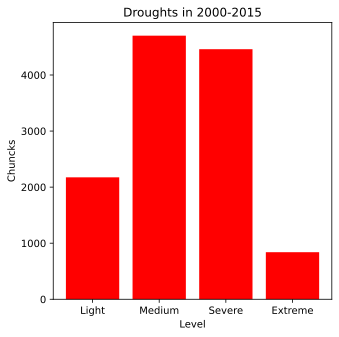

In [38]:
fig,ax = plt.subplots(figsize=(5,5))

ax.bar(['Light','Medium','Severe','Extreme'],df_counts,color='red',label='Droughts')

ax.set_xlabel('Level')
ax.set_ylabel('Chuncks')

ax.title.set_text('Droughts in 2000-2015')

Text(0.5, 1.0, 'Floods in 2000-2015')

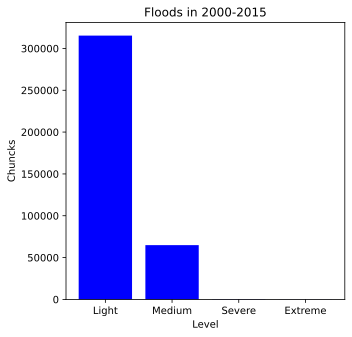

In [39]:
fig,ax = plt.subplots(figsize=(5,5))

ax.bar(['Light','Medium','Severe','Extreme'],ff_counts,color='blue',label='Floods')

ax.set_xlabel('Level')
ax.set_ylabel('Chuncks')

ax.set_title('Floods in 2000-2015')